In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/supermarket_sales - Sheet1.csv'
df = pd.read_csv(file_path)

# Data Preparation
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Payment']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering
# Create features like month and day of week
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Define features and target
features = ['Branch', 'City', 'Customer type', 'Gender', 'Payment', 'Unit price', 'Quantity', 'Month', 'DayOfWeek']
target = 'Product line'

# Encode the target variable
target_le = LabelEncoder()
df[target] = target_le.fit_transform(df[target])

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=target_le.classes_))


# Function to predict product based on city and gender
def predict_product(city, gender):
    # Encode the input values
    city_encoded = label_encoders['City'].transform([city])[0]
    gender_encoded = label_encoders['Gender'].transform([gender])[0]


    # Create a sample input with default values
    sample_input = {
        'Branch': [0],  # Default value, can be adjusted
        'City': [city_encoded],
        'Customer type': [0],  # Default value, can be adjusted
        'Gender': [gender_encoded],
        'Payment': [0],  # Default value, can be adjusted
        'Unit price': [50],  # Default value, can be adjusted
        'Quantity': [5],  # Default value, can be adjusted
        'Month': [0],  # Default value, can be adjusted
        'DayOfWeek': [3]  # Default value, can be adjusted
    }

    # Convert the sample input to a DataFrame
    sample_df = pd.DataFrame(sample_input)

    # Predict the product line
    predicted_product_index = clf.predict(sample_df)[0]
    predicted_product = target_le.inverse_transform([predicted_product_index])[0]

    return predicted_product

# Example usage
city = 'Yangon'
gender = 'Male'
# Month = '6'
predicted_product = predict_product(city, gender)
print(f'The predicted product for a {gender} customer in {city} is: {predicted_product}')

Accuracy: 0.155
                        precision    recall  f1-score   support

Electronic accessories       0.23      0.16      0.19        38
   Fashion accessories       0.15      0.16      0.16        38
    Food and beverages       0.12      0.24      0.16        25
     Health and beauty       0.10      0.06      0.07        35
    Home and lifestyle       0.19      0.18      0.18        34
     Sports and travel       0.16      0.17      0.16        30

              accuracy                           0.15       200
             macro avg       0.16      0.16      0.15       200
          weighted avg       0.16      0.15      0.15       200

The predicted product for a Male customer in Yangon is: Home and lifestyle


# **Acquisition by gender and state**

# **Acquisition by graph**

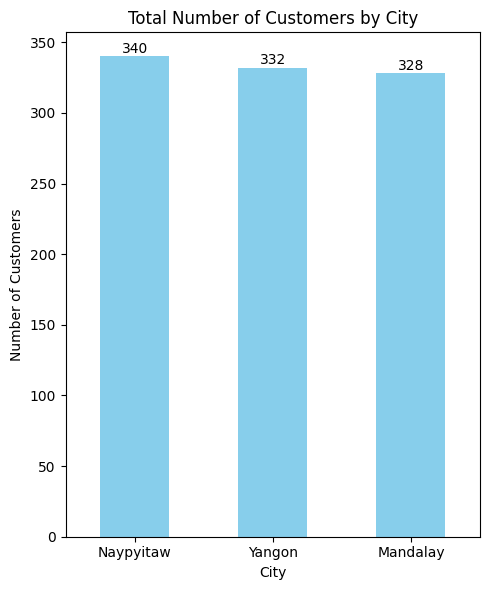

The city with the highest number of customers is: Naypyitaw with 340 customers. The company should focus on acquiring more customers from this region.


In [3]:
import matplotlib.pyplot as plt


df['City'] = df['City'].replace({0: 'Yangon', 1: 'Mandalay', 2 : 'Naypyitaw'})

# Group data by city and count total number of customers
customer_count_by_city = df['City'].value_counts()

# Define the size of the plot
plt.figure(figsize=(5, 6))  # Adjust width and height as needed

# Plot the data
bars = customer_count_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add values above bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

# Find the city with the highest number of customers
city_highest_customers = customer_count_by_city.idxmax()
number_of_customers = customer_count_by_city.max()

print(f"The city with the highest number of customers is: {city_highest_customers} with {number_of_customers} customers. The company should focus on acquiring more customers from this region.")


# **Segmentation**

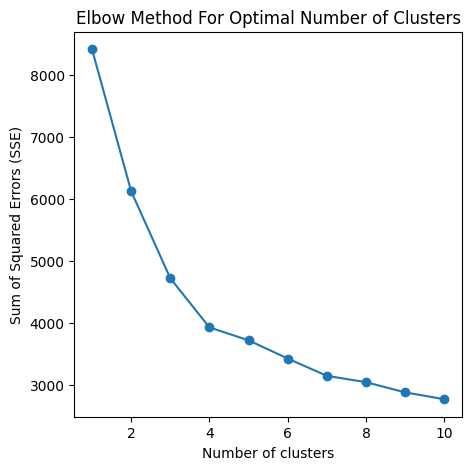

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the data
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select features for clustering
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Rating']
X = df[features]

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


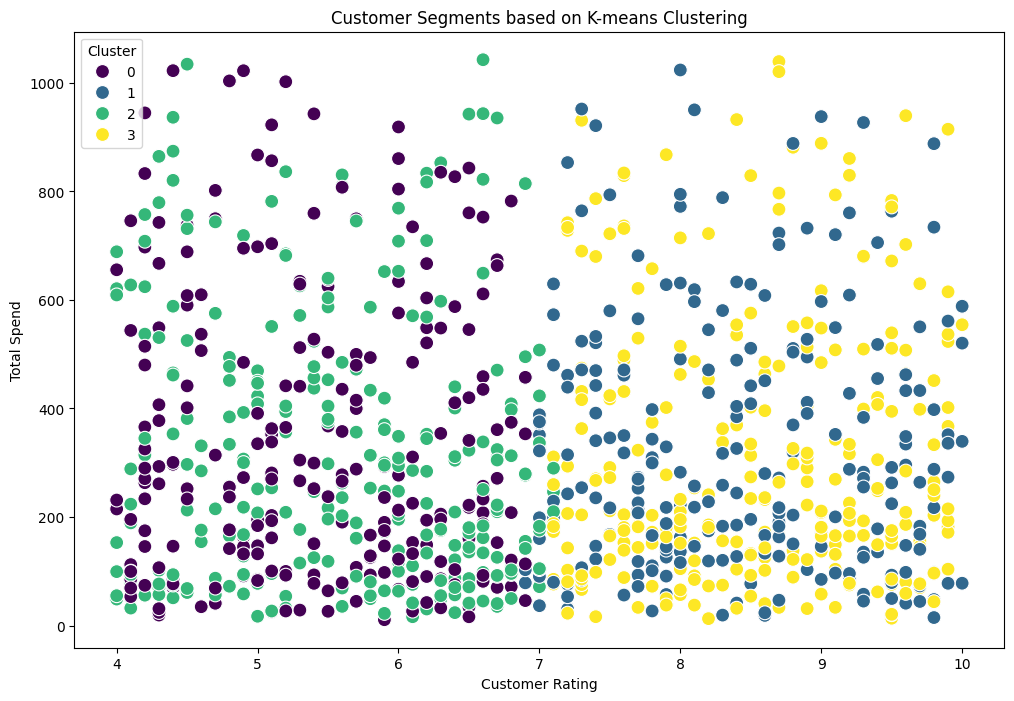

In [5]:
# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Rating', y='Total', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on K-means Clustering')
plt.xlabel('Customer Rating')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()

# Display the dataframe using standard Python (replace the commented line)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Customer Segments", dataframe=df)
# print(df)

import sys
sys.path.append('.')  # Add the current directory to the Python path

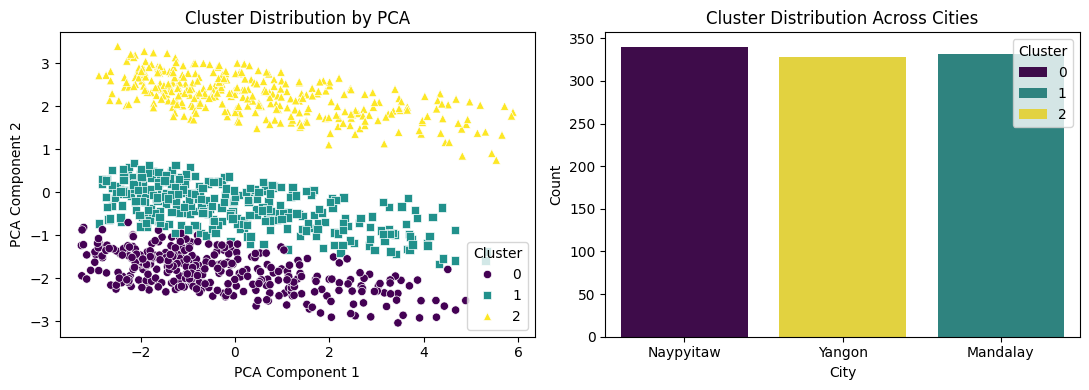

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame `df` is already loaded and preprocessed

# One-Hot Encode categorical variables
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Select relevant features for clustering, EXCLUDING 'Invoice ID'
features = df_encoded.drop(columns=['Date', 'Time', 'gross margin percentage', 'gross income', 'Rating', 'Invoice ID']) # Remove 'Invoice ID'

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, style='Cluster', markers=['o', 's', '^'])
plt.title('Cluster Distribution by PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Cluster Distribution Across Cities and Branches
df['City'] = df['City'].replace({0: 'Yangon', 1: 'Naypyitaw', 2: 'Mandalay'})
df['Branch'] = df['Branch'].replace({0: 'A', 1: 'B', 2: 'C'})

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='City', hue='Cluster', palette='viridis')
plt.title('Cluster Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

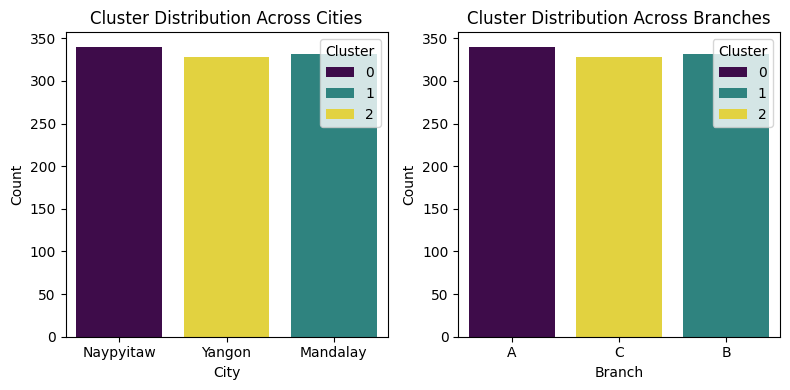

In [7]:
#1) Cluster Distribution Across Cities and Branches
df['City'] = df['City'].replace({0: 'Yangon', 1: 'Naypyitaw', 2: 'Mandalay'})
df['Branch'] = df['Branch'].replace({0: 'A', 1: 'B', 2: 'C'})


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='City', hue='Cluster', palette='viridis')
plt.title('Cluster Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Branch', hue='Cluster', palette='viridis')
plt.title('Cluster Distribution Across Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


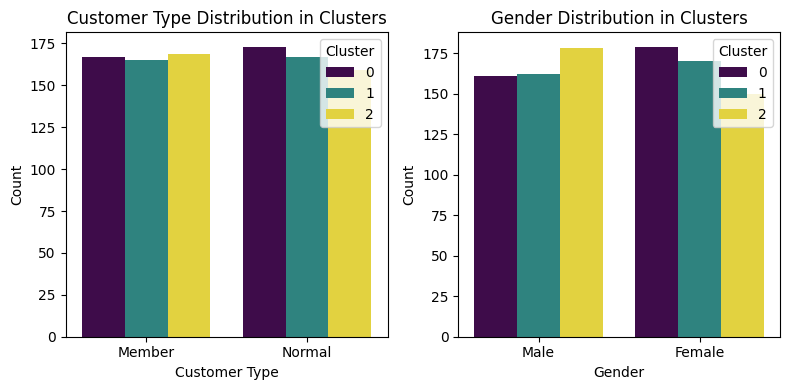

In [8]:
# 2) Customer Type and Gender Distribution in Clusters

df['Customer type'] = df['Customer type'].replace({0: 'Member', 1: 'Normal'})
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Customer type', hue='Cluster', palette='viridis')
plt.title('Customer Type Distribution in Clusters')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', hue='Cluster', palette='viridis')
plt.title('Gender Distribution in Clusters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


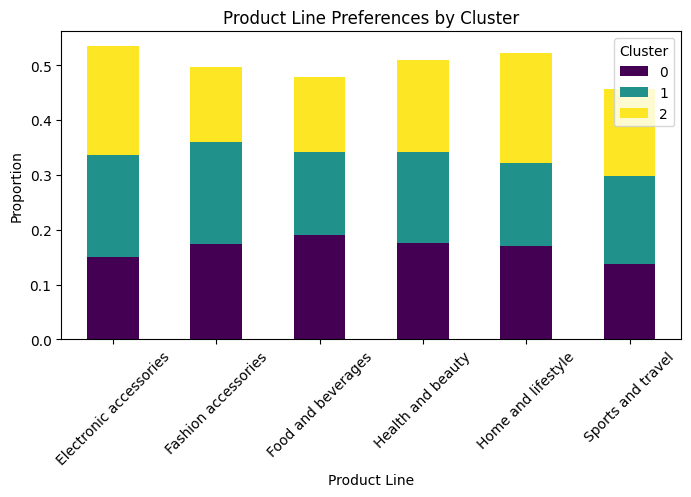

In [9]:
# 3)Product Line Preferences by Cluster

df['Product line'] = df['Product line'].replace({0: 'Health and beauty', 1: 'Electronic accessories',  2 : 'Home and lifestyle', 3: "Sports and travel", 4 : 'Food and beverages' , 5 :'Fashion accessories'})

product_line_cluster = pd.crosstab(df['Product line'], df['Cluster'], normalize='columns')

product_line_cluster.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.title('Product Line Preferences by Cluster')
plt.xlabel('Product Line')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


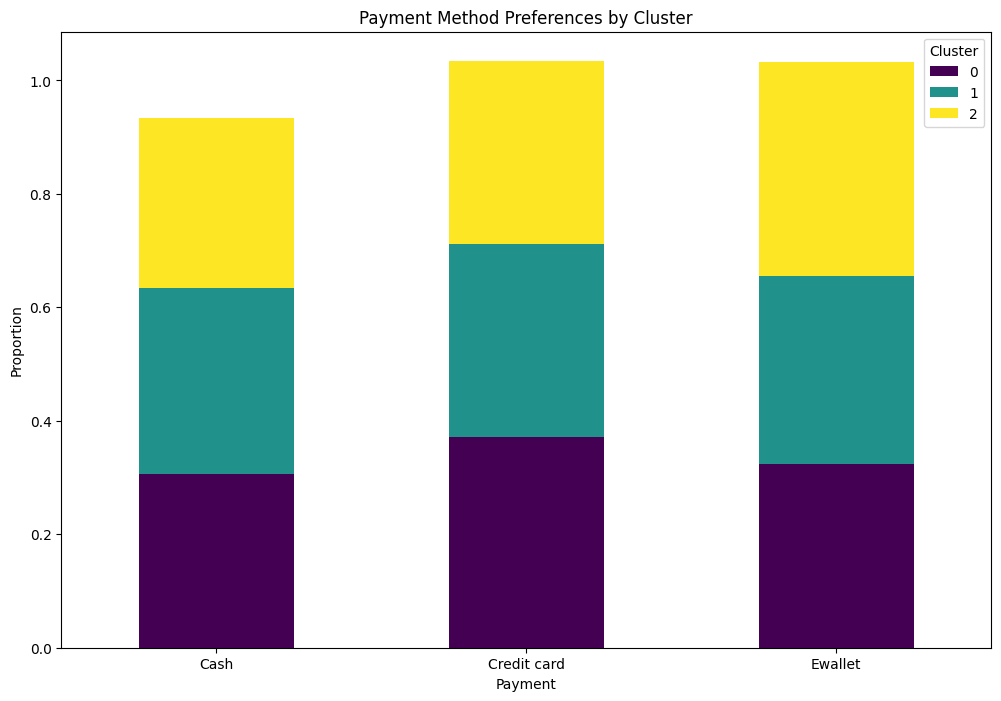

In [10]:
#4) Payment Method Preferences by Cluster

df['Payment'] = df['Payment'].replace({0: 'Ewallet', 1: 'Cash', 2: 'Credit card'})


payment_method_cluster = pd.crosstab(df['Payment'], df['Cluster'], normalize='columns')

payment_method_cluster.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Payment Method Preferences by Cluster')
plt.xlabel('Payment')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.xticks(rotation=0)
plt.show()

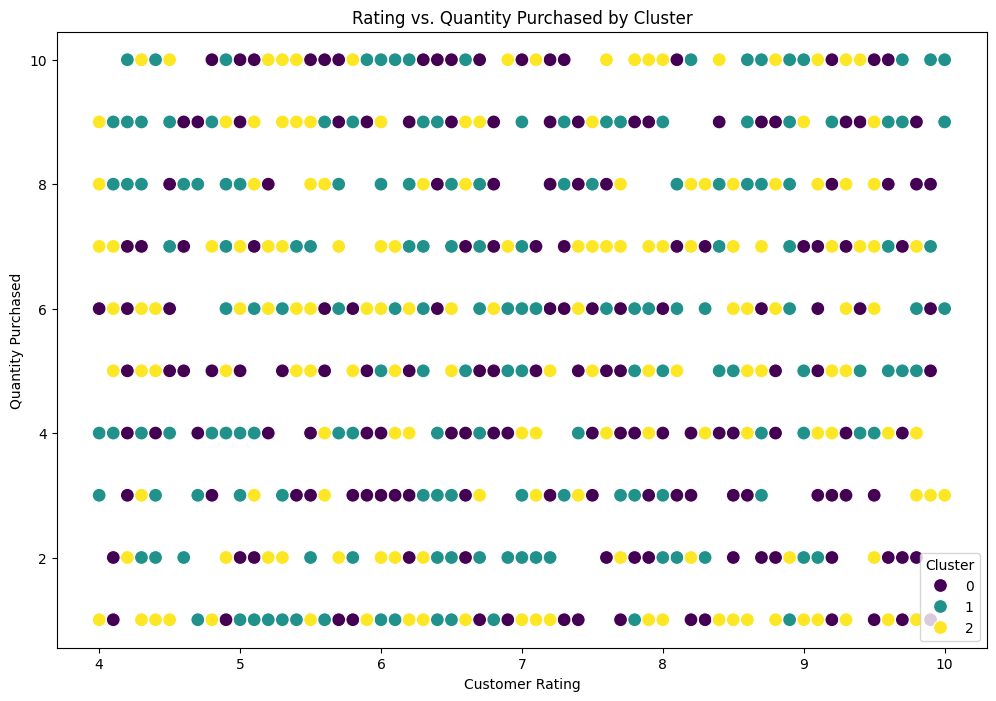

In [11]:
# 5) Rating vs. Quantity Purchased
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Rating', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title('Rating vs. Quantity Purchased by Cluster')
plt.xlabel('Customer Rating')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()


Cluster Centers (Centroids):
   Unit price  Quantity     Tax 5%       Total        cogs     Month  \
0   54.780853  5.467647  14.874001  312.354031  297.480029  2.023529   
1   55.659277  5.481928  15.232024  319.872506  304.640482  2.003012   
2   56.609024  5.582317  16.052367  337.099715  321.047348  1.951220   

   DayOfWeek   Cluster      Branch_0      Branch_1  ...  Gender_1  \
0   3.050000  1.508824  1.000000e+00 -1.609823e-15  ...  0.526471   
1   3.009036  1.445783  1.720846e-15  1.000000e+00  ...  0.512048   
2   3.036585  1.658537  1.720846e-15 -1.498801e-15  ...  0.457317   

   Product line_0  Product line_1  Product line_2  Product line_3  \
0        0.176471        0.150000        0.170588        0.138235   
1        0.165663        0.186747        0.150602        0.159639   
2        0.167683        0.198171        0.201220        0.158537   

   Product line_4  Product line_5  Payment_0  Payment_1  Payment_2  
0        0.191176        0.173529   0.323529   0.305882   0

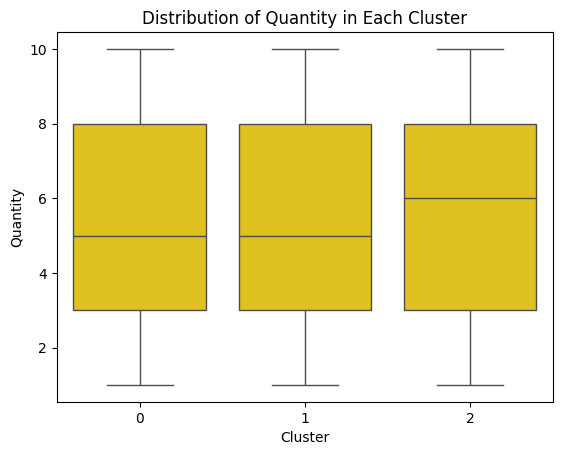

Cluster Sizes:
Cluster
0    340
1    332
2    328
Name: count, dtype: int64


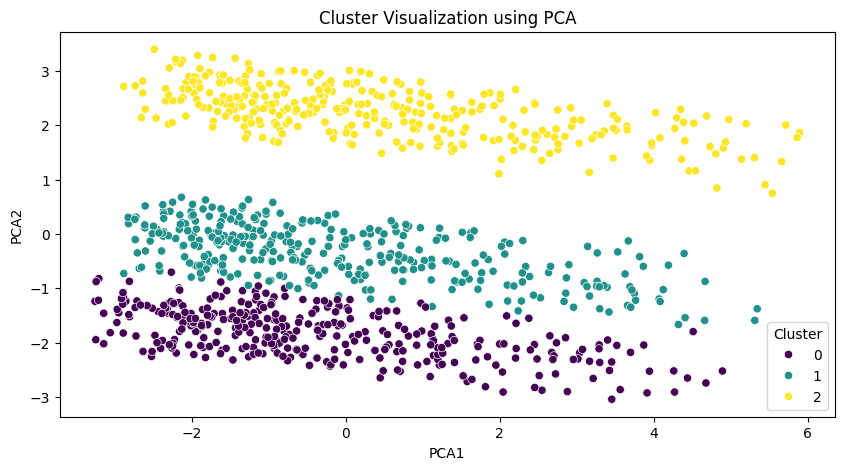

(   Unit price  Quantity     Tax 5%       Total        cogs     Month  \
 0   54.780853  5.467647  14.874001  312.354031  297.480029  2.023529   
 1   55.659277  5.481928  15.232024  319.872506  304.640482  2.003012   
 2   56.609024  5.582317  16.052367  337.099715  321.047348  1.951220   
 
    DayOfWeek   Cluster      Branch_0      Branch_1  ...  Gender_1  \
 0   3.050000  1.508824  1.000000e+00 -1.609823e-15  ...  0.526471   
 1   3.009036  1.445783  1.720846e-15  1.000000e+00  ...  0.512048   
 2   3.036585  1.658537  1.720846e-15 -1.498801e-15  ...  0.457317   
 
    Product line_0  Product line_1  Product line_2  Product line_3  \
 0        0.176471        0.150000        0.170588        0.138235   
 1        0.165663        0.186747        0.150602        0.159639   
 2        0.167683        0.198171        0.201220        0.158537   
 
    Product line_4  Product line_5  Payment_0  Payment_1  Payment_2  
 0        0.191176        0.173529   0.323529   0.305882   0.370588  
 1

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans # Added import statement
# Assuming 'scaled_features' is the scaled data you want to use for clustering
kmeans = KMeans(n_clusters=3, random_state=42) # Reinitialize kmeans
kmeans.fit(scaled_features) # Fit the model to the data


# Get the cluster centers
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroid_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features.columns)

# Display the centroids to understand the typical feature values for each cluster
print("Cluster Centers (Centroids):")
print(centroid_df)

# Analyze the distribution of features in each cluster
# For simplicity, we show the distribution of 'Quantity' in each cluster
plot_color = 'gold'
sns.boxplot(x='Cluster', y='Quantity', data=df, color = plot_color)
plt.title('Distribution of Quantity in Each Cluster')
plt.show()


# Check the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()



# Displaying the centroids and cluster sizes for user review
centroid_df, cluster_counts